In [36]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


## # Data Prep 

- Gathered browns' most recent schedule and game results data from Pro football referece .com on Dec 21 
- Downloaded last 3 full seasons from 2019 to 2021 and partial season for 2022 which only includes first 16 regular season games 
- Combine games into one excel document 
- remove bye weeks 
- Deleted data corresponding to expected points, because this is an engineered feature 
- Rename columns under categories score, offense and defense and expected points 
    - tm to points scored, opp to points allowed 
    - 1st downs gained
    - pass yards gained 
    - rush yards gained 
    - turnovers 
    
    Defense 
    - first downs allowed 
    - total yards allowed 
    - pass yards allowed 
    - rush yards allowed 
    - forced turnovers 
 - Including playoff games in record because goal is to predict browns ability to win a game regardless of whether it is regular season or post season 
 
- delete first row of data (score, offense, defense should be removed) 
- updated dates to reflect year game was played


In [2]:
df = pd.read_excel('consolidated record.xls')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Week        65 non-null     int64         
 1   Day         65 non-null     object        
 2   Date        65 non-null     datetime64[ns]
 3   Unnamed: 3  65 non-null     object        
 4   Unnamed: 4  65 non-null     object        
 5   Unnamed: 5  65 non-null     object        
 6   OT          1 non-null      object        
 7   Rec         65 non-null     object        
 8   Location    33 non-null     object        
 9   Opp         65 non-null     object        
 10  tm          65 non-null     int64         
 11  Opp.1       65 non-null     int64         
 12  1stD o      65 non-null     int64         
 13  TotYd o     65 non-null     int64         
 14  PassY o     65 non-null     int64         
 15  RushY o     65 non-null     int64         
 16  TO o        47 non-null     

In [4]:
# drop columns don't want: OT, Rec, Week, Unnamed: 3, 4
# dropping columns 
df = df.drop(columns= ['Week','Day','Date','Unnamed: 3','Unnamed: 4','OT','Rec'])



In [5]:
 df.columns = [column.replace(' ','_').lower() for column in df]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unnamed:_5  65 non-null     object 
 1   location    33 non-null     object 
 2   opp         65 non-null     object 
 3   tm          65 non-null     int64  
 4   opp.1       65 non-null     int64  
 5   1std_o      65 non-null     int64  
 6   totyd_o_    65 non-null     int64  
 7   passy_o_    65 non-null     int64  
 8   rushy_o_    65 non-null     int64  
 9   to_o_       47 non-null     float64
 10  1std_d_     65 non-null     int64  
 11  totyd_d_    65 non-null     int64  
 12  passy_d_    65 non-null     int64  
 13  rushy_d_    65 non-null     int64  
 14  to_d_       43 non-null     float64
dtypes: float64(2), int64(10), object(3)
memory usage: 7.7+ KB


In [7]:
# renaming column names to more readable format
df = df.rename(columns = {'unnamed:_5':'result', 'opp':'opponent',
                              'opp.1':'points_allowed', 
                              'tm':'points_scored',
                              '1std_o':'first_downs_gained', 'totyd_o_':'total_yards_gained',
                              'passy_o_':'pass_yards_gained',
                              'rushy_o_':'rush_yards_gained','to_o_':'turnovers','1std_d_':'first_downs_allowed',
                              'totyd_d_':'total_yards_allowed',
                              'passy_d_':'pass_yards_allowed','rushy_d_':'rush_yards_allowed',
                              'to_d_':'turnovers_forced',})

In [8]:
# cleaned column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   result               65 non-null     object 
 1   location             33 non-null     object 
 2   opponent             65 non-null     object 
 3   points_scored        65 non-null     int64  
 4   points_allowed       65 non-null     int64  
 5   first_downs_gained   65 non-null     int64  
 6   total_yards_gained   65 non-null     int64  
 7   pass_yards_gained    65 non-null     int64  
 8   rush_yards_gained    65 non-null     int64  
 9   turnovers            47 non-null     float64
 10  first_downs_allowed  65 non-null     int64  
 11  total_yards_allowed  65 non-null     int64  
 12  pass_yards_allowed   65 non-null     int64  
 13  rush_yards_allowed   65 non-null     int64  
 14  turnovers_forced     43 non-null     float64
dtypes: float64(2), int64(10), object(3)
memory

## Address nulls 
- location 
- turnovers 
- turnovers forced 

null in turnovervs and turnovers forced can be replaced with 0 
null for location means home game 

In [9]:
# fill all nans with zero value 
df = df.fillna(0)

In [10]:
# no more nulls 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   result               65 non-null     object 
 1   location             65 non-null     object 
 2   opponent             65 non-null     object 
 3   points_scored        65 non-null     int64  
 4   points_allowed       65 non-null     int64  
 5   first_downs_gained   65 non-null     int64  
 6   total_yards_gained   65 non-null     int64  
 7   pass_yards_gained    65 non-null     int64  
 8   rush_yards_gained    65 non-null     int64  
 9   turnovers            65 non-null     float64
 10  first_downs_allowed  65 non-null     int64  
 11  total_yards_allowed  65 non-null     int64  
 12  pass_yards_allowed   65 non-null     int64  
 13  rush_yards_allowed   65 non-null     int64  
 14  turnovers_forced     65 non-null     float64
dtypes: float64(2), int64(10), object(3)
memory

In [11]:
# replace zeros in location with word home and replace @ symbol with away 


df['location'] = df['location'].replace([0, '@'], ['home', 'away',])


In [12]:
df.shape
#65 observations with 15 columns 

(65, 15)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
points_scored,65.0,22.615385,10.929736,3.0,14.0,22.0,29.0,49.0
points_allowed,65.0,24.123077,11.009240,3.0,16.0,23.0,32.0,47.0
first_downs_gained,65.0,20.676923,4.870535,9.0,17.0,21.0,24.0,33.0
total_yards_gained,65.0,352.830769,77.791301,180.0,300.0,355.0,398.0,531.0
pass_yards_gained,65.0,213.276923,61.924982,78.0,171.0,205.0,254.0,355.0
rush_yards_gained,65.0,139.553846,54.467889,40.0,99.0,138.0,182.0,307.0
turnovers,65.0,1.323077,1.147112,0.0,0.0,1.0,2.0,4.0
first_downs_allowed,65.0,20.876923,5.619463,6.0,17.0,20.0,24.0,35.0
total_yards_allowed,65.0,347.707692,89.621901,47.0,302.0,339.0,397.0,566.0
pass_yards_allowed,65.0,224.892308,85.946408,1.0,182.0,216.0,268.0,501.0


In [32]:
# Baseline will be assuming browns lose every game and this will result in a 51% accuracy 
df.result.value_counts(normalize=True)

L    0.507692
W    0.492308
Name: result, dtype: float64

In [34]:
# Total record last 3.5 seasons 
df.result.value_counts()

L    33
W    32
Name: result, dtype: int64

### takeaways
- browns lose more than they win 
- Baseline model would be browns lose every game and would be right 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   result               65 non-null     object 
 1   location             65 non-null     object 
 2   opponent             65 non-null     object 
 3   points_scored        65 non-null     int64  
 4   points_allowed       65 non-null     int64  
 5   first_downs_gained   65 non-null     int64  
 6   total_yards_gained   65 non-null     int64  
 7   pass_yards_gained    65 non-null     int64  
 8   rush_yards_gained    65 non-null     int64  
 9   turnovers            65 non-null     float64
 10  first_downs_allowed  65 non-null     int64  
 11  total_yards_allowed  65 non-null     int64  
 12  pass_yards_allowed   65 non-null     int64  
 13  rush_yards_allowed   65 non-null     int64  
 14  turnovers_forced     65 non-null     float64
dtypes: float64(2), int64(10), object(3)
memory

In [20]:
# Converting data types to integers 
df.astype({'turnovers':'int64','turnovers_forced':'int64'}).dtypes

result                 object
location               object
opponent               object
points_scored           int64
points_allowed          int64
first_downs_gained      int64
total_yards_gained      int64
pass_yards_gained       int64
rush_yards_gained       int64
turnovers               int64
first_downs_allowed     int64
total_yards_allowed     int64
pass_yards_allowed      int64
rush_yards_allowed      int64
turnovers_forced        int64
dtype: object

In [ ]:
# split data, complete exploration of variables, come up with statistical questions 

In [23]:
# split data 

# splitting data into test and validate samples 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.result)
# splitting data into train and validate samples 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.result)

In [25]:
train.shape

(36, 15)

In [26]:
validate.shape

(16, 15)

In [27]:
test.shape

(13, 15)

In [30]:
train

,result,location,opponent,points_scored,points_allowed,first_downs_gained,total_yards_gained,pass_yards_gained,rush_yards_gained,turnovers,first_downs_allowed,total_yards_allowed,pass_yards_allowed,rush_yards_allowed,turnovers_forced
43,L,away,New England Patriots,7,45,17,217,118,99,1.0,30,452,268,184,0.0
35,W,home,Houston Texans,31,21,22,355,199,156,2.0,17,302,220,82,2.0
55,L,home,Los Angeles Chargers,28,30,27,443,230,213,1.0,26,465,227,238,0.0
0,L,home,Tennessee Titans,13,43,19,346,244,102,3.0,21,339,216,123,0.0
26,W,away,Jacksonville Jaguars,27,25,25,459,252,207,1.0,22,375,235,140,0.0
45,L,away,Baltimore Ravens,10,16,14,262,222,40,2.0,22,303,155,148,4.0
44,W,home,Detroit Lions,13,10,22,349,165,184,2.0,12,245,77,168,2.0
15,L,away,Cincinnati Bengals,23,33,15,313,239,74,3.0,22,361,182,179,1.0
27,W,away,Tennessee Titans,41,35,26,458,340,118,1.0,25,431,369,62,3.0
24,W,home,Houston Texans,10,7,20,356,125,231,0.0,16,243,153,90,0.0


<AxesSubplot:xlabel='location', ylabel='count'>

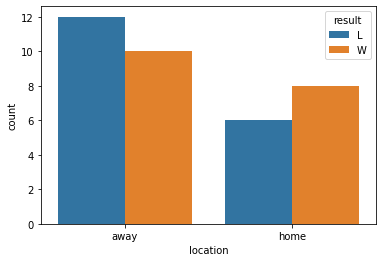

In [38]:
# Create for loop to produce graphics for categorical variables and target 
# categoricals location
sns.countplot(data=train, x="location", hue="result")

In [39]:
#statistical test / Chi square because both variables are categorical variables
# cross tab created in preparation to run chi^2 test

observed = pd.crosstab(train.result, train.location)
observed

location,away,home
result,,
L,12,6
W,10,8


In [40]:
# chi square statistical test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

p

0.7324398999038724

### Takeaways 
- appears that browns win more games at home then away
- not significant according to test 

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 43 to 40
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   result               36 non-null     object 
 1   location             36 non-null     object 
 2   opponent             36 non-null     object 
 3   points_scored        36 non-null     int64  
 4   points_allowed       36 non-null     int64  
 5   first_downs_gained   36 non-null     int64  
 6   total_yards_gained   36 non-null     int64  
 7   pass_yards_gained    36 non-null     int64  
 8   rush_yards_gained    36 non-null     int64  
 9   turnovers            36 non-null     float64
 10  first_downs_allowed  36 non-null     int64  
 11  total_yards_allowed  36 non-null     int64  
 12  pass_yards_allowed   36 non-null     int64  
 13  rush_yards_allowed   36 non-null     int64  
 14  turnovers_forced     36 non-null     float64
dtypes: float64(2), int64(10), object(3)
memor

In [ ]:
# comparing mean of rush yards in games won to mean of all games 
# same outcome for both variables, win result 


<AxesSubplot:>

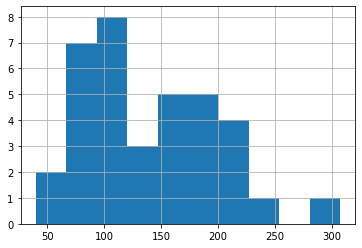

In [55]:
# distribution of rush yards per game 
train.rush_yards_gained.hist()

<AxesSubplot:>

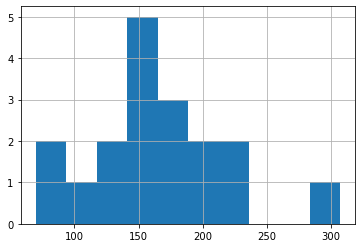

In [69]:
# mean of rush yards in games won 
rush_sample = train[train.result == "W"].rush_yards_gained

rush_sample.hist()

In [53]:
# mean of rush yards in all games 
overall_mean_rush = train.rush_yards_gained.mean()

In [54]:
# stats test 
t, p = stats.ttest_1samp(rush_sample, overall_mean_rush)

print(t, p/2)



1.8872370428004273 0.038162039041491395


###  hypothesis 

Hnull: Mean rushing yards in games won <= mean of rush yards in all games <br>
Halt: Mean of rushing yards in games won is > mean of rush yards in all games 


### takeaway 
- reject null hypothesis and accept alternative 
- there is support for the idea that the man of rushing yards in games won is greater than in all games 
- consider using rush yards for model 

<AxesSubplot:>

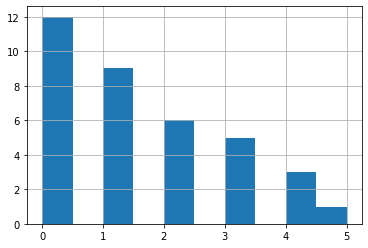

In [72]:
train.turnovers_forced.hist()

<AxesSubplot:>

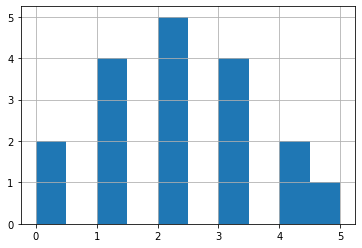

In [70]:
# Is there a relationshp between forced turnovers and result of game 
forced_turnover_sample = train[train.result == "W"].turnovers_forced

forced_turnover_sample.hist()

In [75]:
overall_mean_forced_turnovers = train.turnovers_forced.mean()

In [76]:
# stats test 
t, p = stats.ttest_1samp(forced_turnover_sample, overall_mean_forced_turnovers)

print(t, p/2)


2.1308679664864942 0.023998390047606413


In [ ]:
# Hypothesis 

Hnull: Mean forced turnovers in games won <= mean of forced turnovers in all games <br>
Halt: Mean of forced turnovers in games won is > mean of forced turnovers in all games 

### Takeaways 

- Statistical tests supports the idea that forced turnovers has a relationship with the result of the game 

In [83]:
rush_two_hundred_sample = train[train.result == "W"].rush_yards_gained > 200
#rush_sample = train[train.result == "W"].rush_yards_gained

<AxesSubplot:>

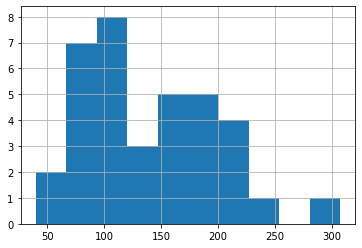

In [91]:
train.rush_yards_gained.hist()

In [95]:
rush_two_hundred_sample.value_counts()

False    14
True      4
Name: rush_yards_gained, dtype: int64

In [88]:
# stats test 
t, p = stats.ttest_1samp(rush_two_hundred_sample, overall_mean_rush)

print(t, p/2)

-1366.9644224129815 1.3496277829601584e-44


In [ ]:
# Takeaways 
significant difference in mean of rush yards in games browns won compared to all games 

In [98]:
#Do Browns win when they allow less than 300 total yards? 

total_yards_allowed_sample = train[train.result == "W"].total_yards_allowed < 300

In [99]:
overall_mean_total_yards = train.total_yards_allowed.mean()

In [101]:
# stats test 
t, p = stats.ttest_1samp(total_yards_allowed_sample, overall_mean_total_yards)

print(t, p/2)

-2971.228689974065 2.501487448554588e-50


In [ ]:
### Takeaways 

- allowing less than 300 yards has a relationship with the result of the game 

In [ ]:
#Do browns win when they have less than 2 turnovers? 


In [102]:
# boolean mask for turnovers less than 2 
turnovers_sample = train[train.result == "W"].turnovers < 2

In [103]:
overall_mean_turnovers = train.turnovers.mean()

In [104]:
# stats test 
t, p = stats.ttest_1samp(turnovers_sample, overall_mean_turnovers)

print(t, p/2)

-5.2342450676837275 3.366189182644262e-05


### takeaways
- less than two turnovers has a relationship with the result of the game 

## Prepare for modeling 

In [ ]:
# create columns with booleans for 